In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import sklearn

In [2]:
df=pd.read_csv(r'dataset\Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df['Surname'].value_counts()    #useless entity, so removing it

Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Salinas       1
Cleveland     1
Kashiwagi     1
Aldridge      1
Burbidge      1
Name: count, Length: 2932, dtype: int64

In [9]:
# Removing the unwanted features from the dataset
df=df.drop(columns=['RowNumber','CustomerId','Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
# Converting Categorical data to numerical
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [21]:
# Splitting the data into train test split
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_test.shape

(2000, 11)

In [23]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [26]:
X_train_scaled.shape

(8000, 11)

In [25]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()

# # adding layer 1
# model.add(Dense(3,activation='sigmoid',input_dim=11))
# # adding final layer
# model.add(Dense(1,activation='sigmoid'))

# editing the layers, weights and biases to acieve better scores
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

d:\Machine_Learning\DeepLearning\.myapp\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
# changed epochs from 10 to 100
# added validation_split which will calculate the accuracy by extracting 0.2 part of the training data as a validation set
# the data of the epoch will be stored in a dictionary
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3209 - val_accuracy: 0.8587 - val_loss: 0.3455
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8706 - loss: 0.3204 - val_accuracy: 0.8575 - val_loss: 0.3445
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8705 - loss: 0.3205 - val_accuracy: 0.8556 - val_loss: 0.3443
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3205 - val_accuracy: 0.8575 - val_loss: 0.3446
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3203 - val_accuracy: 0.8556 - val_loss: 0.3443
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3201 - val_accuracy: 0.8594 - val_loss: 0.3441
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8706 - loss: 0.3202 - val_accuracy: 0.8556 - val_loss: 0.3439
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8697 - loss: 0.3199 - val_accu

In [51]:
# Obtaining the weghts at the zeroth layer
'''
[array([11 weights......
        ................
        ................]], dtype=float32),
array([3 biases..........................], dtype=float32)]
'''
model.layers[0].get_weights()


[array([[ 1.62678123e-01, -2.83477098e-01,  4.50056754e-02,
          4.81488168e-01, -3.54661107e-01, -3.45843360e-02,
          2.33266905e-01,  5.52688688e-02, -6.90578595e-02,
          8.96719694e-02, -1.79947630e-01],
        [ 1.98630858e-02,  4.93417919e-01,  6.94204092e-01,
         -9.41334963e-02,  1.90910459e-01,  4.88276750e-01,
         -1.79283977e-01, -1.80967152e-01, -5.16631722e-01,
         -9.89399731e-01, -5.25979280e-01],
        [ 6.93657249e-02, -3.28167856e-01,  2.27072835e-01,
          4.49368894e-01, -1.22028634e-01,  2.06635654e-01,
         -9.12316218e-02,  1.50309041e-01,  2.48638988e-01,
         -7.45949149e-02, -3.48534554e-01],
        [-1.83320433e-01,  3.15565795e-01, -3.19913983e-01,
          7.92134181e-02, -8.75370622e-01, -3.37596312e-02,
         -5.05126953e-01, -9.53407705e-01, -2.32825011e-01,
         -8.13128799e-02,  3.90682608e-01],
        [ 1.25163281e+00, -6.56071544e-01, -2.81116879e-03,
         -6.48786485e-01, -6.17088735e-01,  

In [52]:
y_log=model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.02719811],
       [0.02442113],
       [0.08301048],
       ...,
       [0.65483695],
       [0.14298475],
       [0.2352323 ]], shape=(2000, 1), dtype=float32)

In [53]:
y_preds=np.where(y_log>0.5,1,0)

In [54]:
# Calculating the acciracy metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8535

In [57]:
# Visulisation of the model training scenario
history.history

{'accuracy': [0.8690624833106995,
  0.8706250190734863,
  0.8704687356948853,
  0.8704687356948853,
  0.8692187666893005,
  0.8689062595367432,
  0.8706250190734863,
  0.8696874976158142,
  0.8712499737739563,
  0.8723437786102295,
  0.8701562285423279,
  0.8725000023841858,
  0.87109375,
  0.8701562285423279,
  0.870312511920929,
  0.8707812428474426,
  0.8721874952316284,
  0.8698437213897705,
  0.8707812428474426,
  0.8712499737739563,
  0.8721874952316284,
  0.8717187643051147,
  0.8715624809265137,
  0.87109375,
  0.8707812428474426,
  0.8721874952316284,
  0.8701562285423279,
  0.8721874952316284,
  0.8714062571525574,
  0.8721874952316284,
  0.8717187643051147,
  0.8725000023841858,
  0.8721874952316284,
  0.8720312714576721,
  0.8706250190734863,
  0.8731250166893005,
  0.8714062571525574,
  0.8712499737739563,
  0.8717187643051147,
  0.8721874952316284,
  0.8723437786102295,
  0.8723437786102295,
  0.8720312714576721,
  0.8721874952316284,
  0.8712499737739563,
  0.87265622615

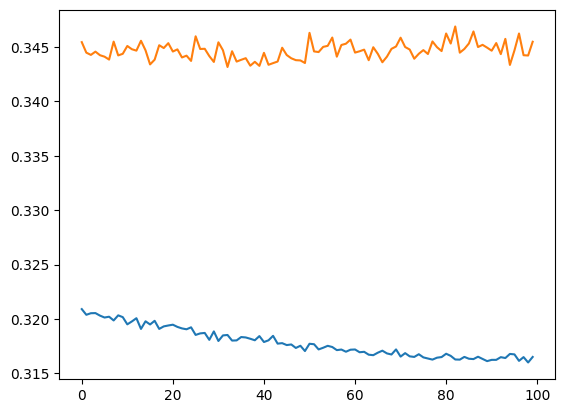

In [62]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

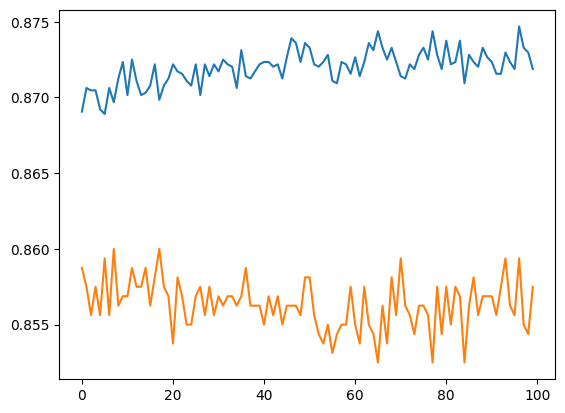

In [63]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);